<a href="https://colab.research.google.com/github/hyejeong14/Digital-Hanaro/blob/main/0601_%EC%8B%9C%EA%B0%81%ED%99%94_%EB%B0%8F_%EC%A0%84%EC%B2%98%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#시각화 도구
- <참고> 파이썬 그래프 갤러리 https://www.python-graph-gallery.com/
- matplotlib <br>
- seaborn

##seaborn

In [ ]:
# 한글 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
# 메뉴 - 런타임 - 런타임 다시 시작

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [ ]:
import seaborn as sns

titanic=sns.load_dataset('titanic')
print(titanic.head())
print('\n')
print(titanic.info())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-

###막대 그래프 (비율)

In [ ]:
import matplotlib.pyplot as plt

#스타일 테마
sns.set_style('whitegrid')

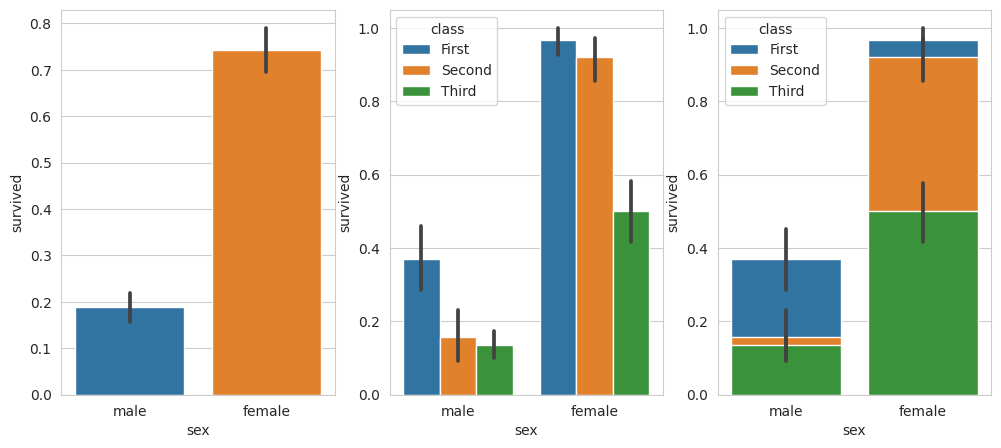

In [ ]:
#그래프 객체 생성
fig = plt.figure(figsize=(12,5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

#그래프 생성
sns.barplot(data = titanic, x = 'sex', y='survived', ax = ax1)
sns.barplot(data = titanic, x = 'sex', y='survived', hue='class' , ax = ax2)
sns.barplot(data = titanic, x = 'sex', y='survived', hue='class',
            dodge=False, ax = ax3)

plt.show()

▲ 위의 그래프에서 선이 같이 나타나는 이유<br>
: 오차를 표시하기 위함 (에러바)<br>
 표준편차, 표준오차, 신뢰구간 등


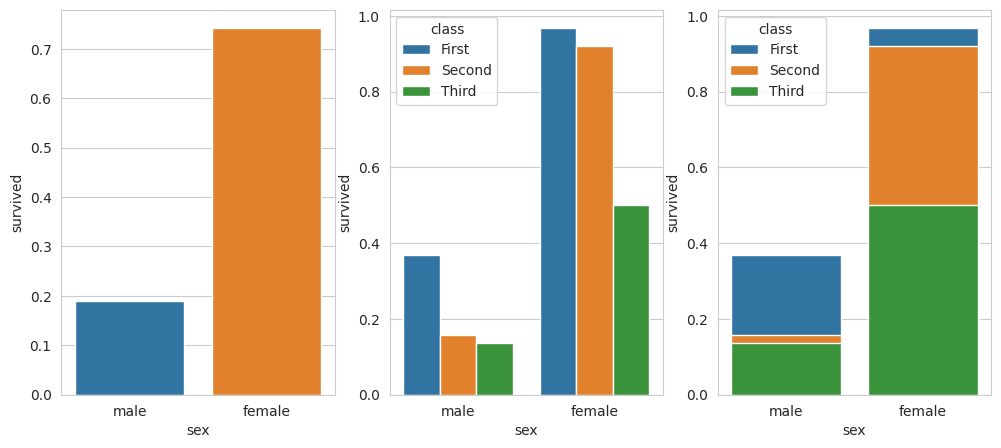

In [ ]:
#그래프 객체 생성
fig = plt.figure(figsize=(12,5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

#그래프 생성
sns.barplot(data = titanic, x = 'sex', y='survived', ax = ax1, errorbar=None)
sns.barplot(data = titanic, x = 'sex', y='survived', hue='class' , ax = ax2,  errorbar=None)
sns.barplot(data = titanic, x = 'sex', y='survived', hue='class',
            dodge=False, ax = ax3, errorbar=None)

plt.show()

###막대 그래프(빈도)

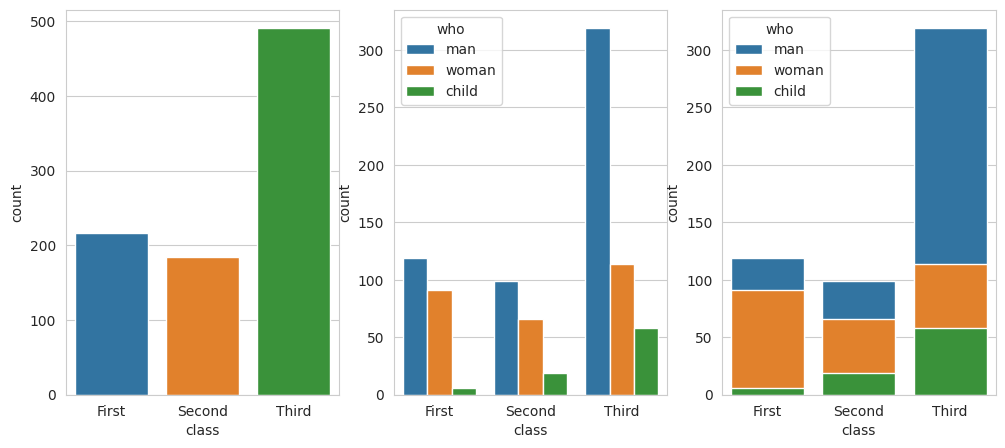

In [ ]:
#그래프 객체 생성
fig = plt.figure(figsize=(12,5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)


#막대 그래프
sns.countplot(data=titanic, x='class', ax = ax1)
sns.countplot(data=titanic, x='class', hue='who', ax = ax2)
sns.countplot(data=titanic, x='class', hue='who', dodge=False, ax = ax3)

plt.show()

<Axes: xlabel='class', ylabel='Count'>

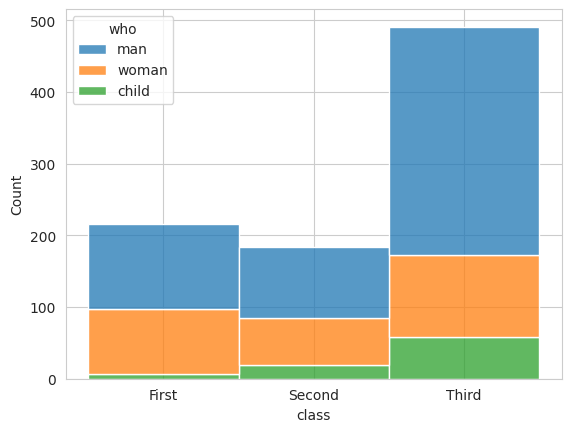

In [ ]:
sns.histplot(x='class',hue='who',multiple='stack',data=titanic) #빈도누적 = 전체합

###상자그림 & 바이올린 그림

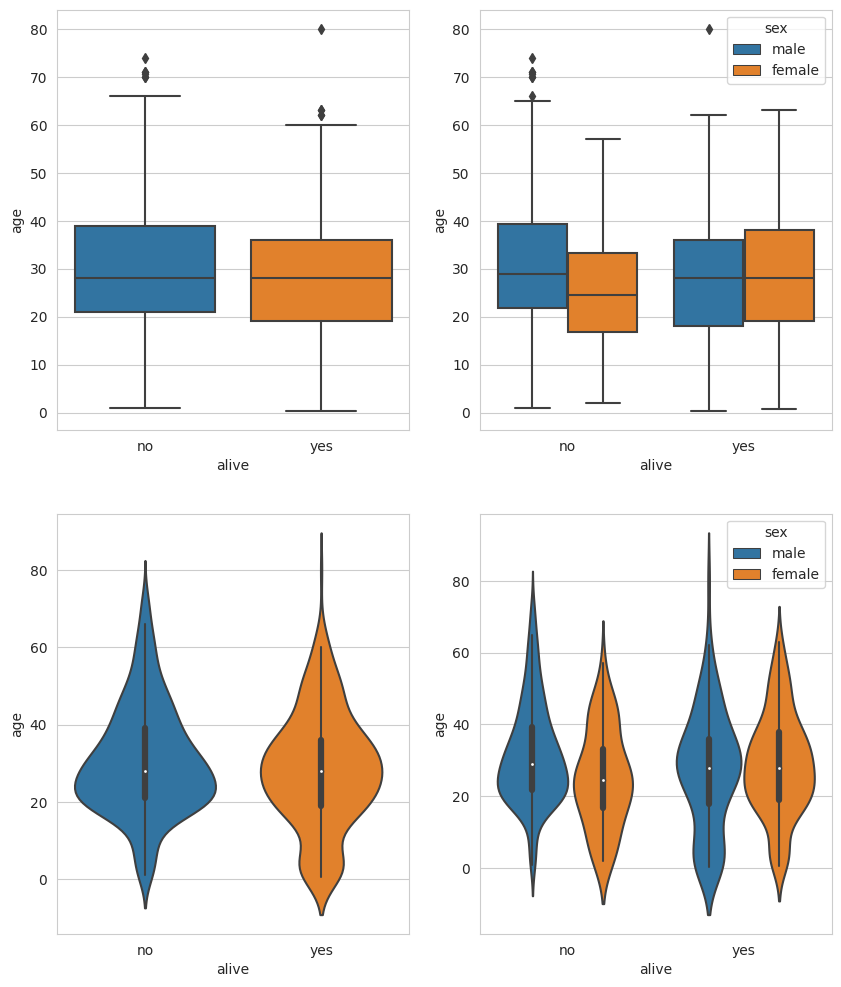

In [ ]:
#그래프 객체 생성
fig = plt.figure(figsize=(10,12))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

#상자 그림
sns.boxplot(data=titanic, x='alive', y='age', ax=ax1)
sns.boxplot(data=titanic, x='alive', y='age', hue='sex', ax=ax2)

#바이올린 그림
sns.violinplot(data=titanic, x='alive', y='age', ax=ax3)
sns.violinplot(data=titanic, x='alive', y='age', hue='sex', ax=ax4)

plt.show()

###조인트 그림

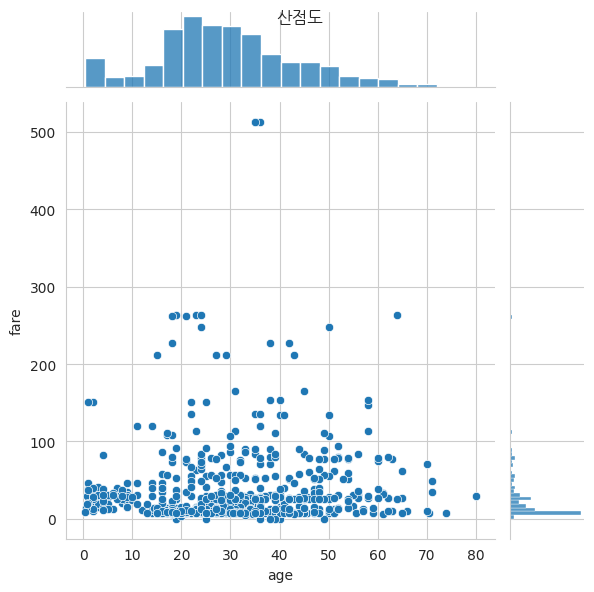

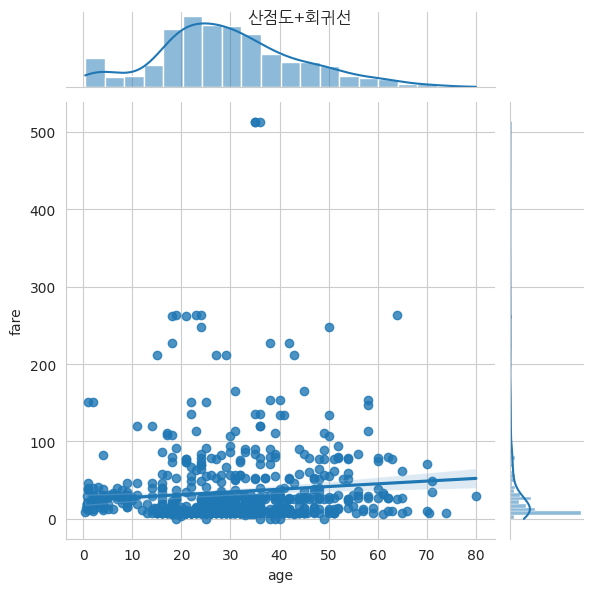

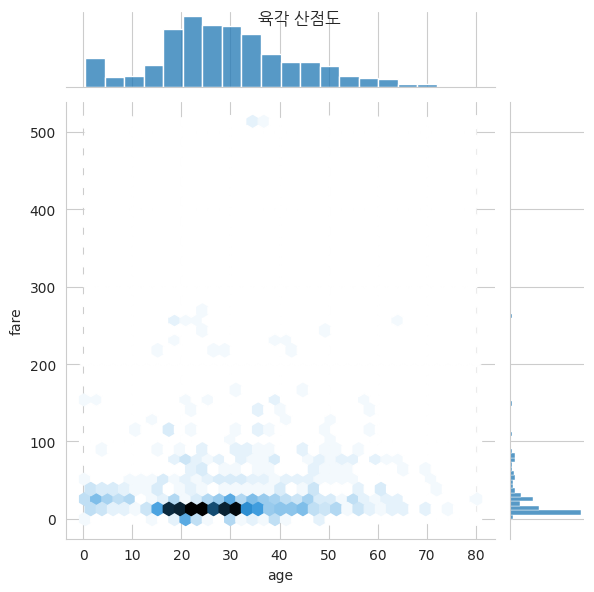

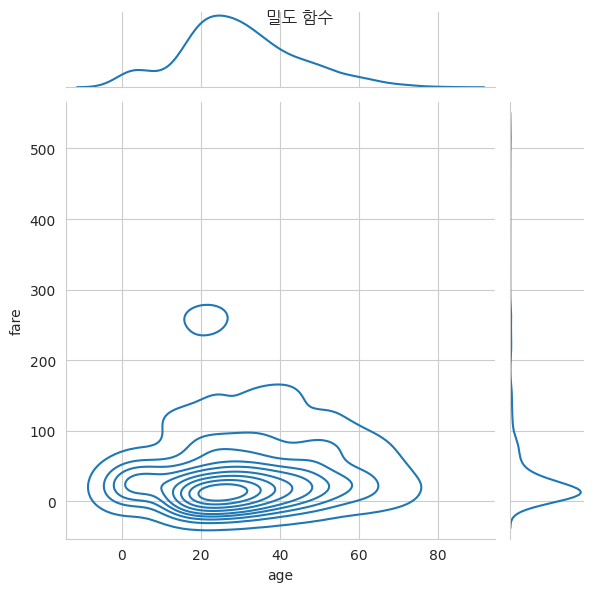

In [ ]:
#조인트 그림 - 산점도 (기본값)
jp1 = sns.jointplot(data=titanic, x='age', y='fare')

#조인트 그림 - 산점도+회귀선
jp2 = sns.jointplot(data=titanic, x='age', y='fare', kind='reg')

#조인트그림 - 육각 산점도
jp3 = sns.jointplot(data=titanic, x='age', y='fare', kind='hex')

#조인트그림 - 밀도 함수
jp4 = sns.jointplot(data=titanic, x='age', y='fare', kind='kde')

#제목 추가
# 한글 폰트 설정
plt.rc("font", family = "NanumGothic")
jp1.fig.suptitle('산점도')
jp2.fig.suptitle('산점도+회귀선')
jp3.fig.suptitle('육각 산점도')
jp4.fig.suptitle('밀도 함수')

plt.show()

###그리드 분할

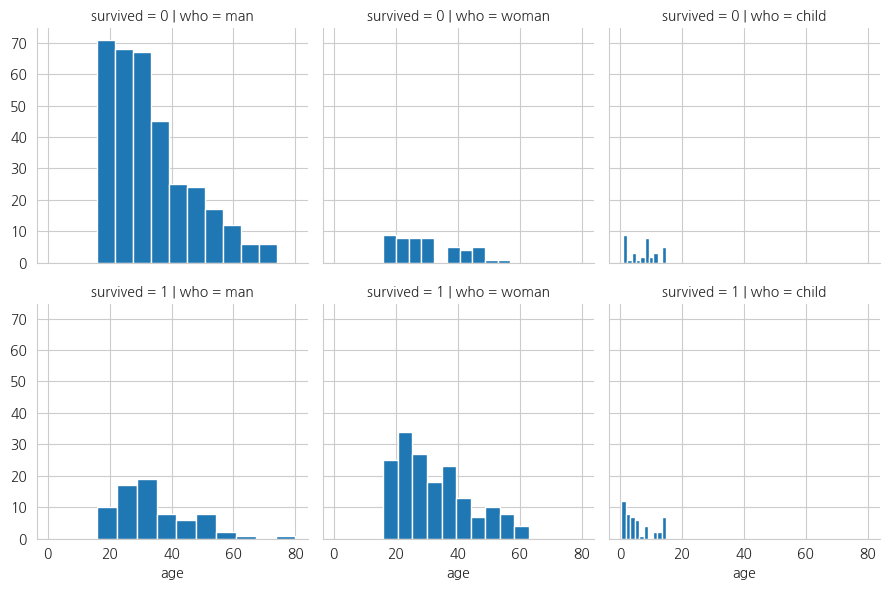

In [ ]:
# 그리드 분할 = 빈도표를 화면 분할하여 시각화
grid = sns.FacetGrid(data=titanic, row = 'survived', col='who')

#그래프 생성
grid.map(plt.hist, 'age')

###pairplot

In [ ]:
#변수들을 2개씩 짝을 지어서 시각화
pair_data = titanic[['age','pclass','fare']]
pair_data

,age,pclass,fare
0,22.0,3,7.2500
1,38.0,1,71.2833
2,26.0,3,7.9250
3,35.0,1,53.1000
4,35.0,3,8.0500
...,...,...,...
886,27.0,2,13.0000
887,19.0,1,30.0000
888,NaN,3,23.4500
889,26.0,1,30.0000


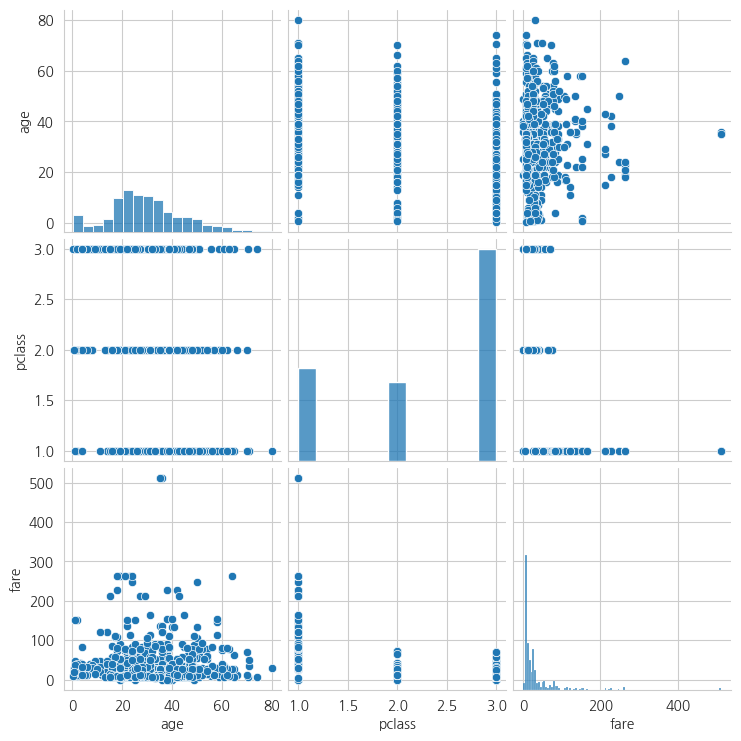

In [ ]:
sns.pairplot(data=pair_data)

##Folium-지도 시각화

In [ ]:
import folium

#서울 지도 만들기
seoul_map = folium.Map(location=[37.55,126.98],zoom_strart=12)
#파일로 저장
seoul_map.save('./seoul_map.html')

In [ ]:
#서울 지도 만들기
seoul_map = folium.Map(location=[37.55,126.98],zoom_strart=12,tiles='Stamen Terrain')
#파일로 저장
seoul_map.save('./seoul_map.html')

In [ ]:
#서울 지도 만들기
seoul_map = folium.Map(location=[37.55,126.98],zoom_strart=12,tiles='Stamen Toner')
#파일로 저장
seoul_map.save('./seoul_map.html')

###마커 표시

In [ ]:
import pandas as pd

df=pd.read_excel('/content/drive/MyDrive/Digital_Hana1/data/서울지역 대학교 위치.xlsx',engine='openpyxl')
df

,Unnamed: 0,위도,경도
0,KAIST 서울캠퍼스,37.592573,127.046737
1,KC대학교,37.548345,126.854797
2,가톨릭대학교(성신교정),37.585922,127.004328
3,가톨릭대학교(성의교정),37.499623,127.006065
4,감리교신학대학교,37.567645,126.961610
5,건국대학교,37.540762,127.079343
6,경기대학교 서울캠퍼스,37.300485,127.035833
7,경희대학교 서울캠퍼스,37.596195,127.052544
8,고려대학교,33.847782,-117.977748
9,광운대학교,37.619496,127.059696


In [ ]:
df = df.set_index('Unnamed: 0')
df.head()

,위도,경도
Unnamed: 0,,
KAIST 서울캠퍼스,37.592573,127.046737
KC대학교,37.548345,126.854797
가톨릭대학교(성신교정),37.585922,127.004328
가톨릭대학교(성의교정),37.499623,127.006065
감리교신학대학교,37.567645,126.961610


In [ ]:
#서울 지도 만들기 - 기본 마커
seoul_map = folium.Map(location=[37.55,126.98],zoom_strart=12,tiles='Stamen Terrain')

#마커 표시
for name, lat, lng in zip(df.index,df.위도,df.경도):
  folium.Marker([lat,lng], popup = name).add_to(seoul_map)

#파일로 저장
seoul_map.save('./seoul_univ.html')

In [ ]:
#서울 지도 만들기 - 원형 마커
seoul_map = folium.Map(location=[37.55,126.98],zoom_strart=12,tiles='Stamen Terrain')

#마커 표시
for name, lat, lng in zip(df.index,df.위도,df.경도):
  folium.CircleMarker([lat,lng], popup = name, radius=15, fill_color = 'coral',
                      fill = True, fill_opacity=0.4, color='black').add_to(seoul_map)

#파일로 저장
seoul_map.save('./seoul_univ_1.html')

###단계 구분도

In [ ]:
import pandas as pd

df = pd.read_excel('/content/drive/MyDrive/Digital_Hana1/data/경기도인구데이터.xlsx', index_col='구분',engine = 'openpyxl')

df.head( )

,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
구분,,,,,,,,,,,
수원시장안구,287474,285803,290798,293692,290999,291757,300908,301196,299016,296479,293828
수원시권선구,310553,308177,304097,306783,321176,332633,331773,339835,351053,358393,365653
수원시팔달구,216945,213235,219833,216503,209772,206794,204805,203479,199180,198515,193311
수원시영통구,252730,260210,258421,260557,266542,289074,310671,329718,335375,340654,349836
성남시수정구,256744,248452,242161,241070,236123,233997,228167,223539,219531,232841,236932


In [ ]:
import json
bnd = json.load(open('/content/drive/MyDrive/Digital_Hana1/data/경기도행정구역경계.json',encoding='utf-8'))

bnd

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'properties': {'code': 31380,
    'name': '양평군',
    'name_eng': 'Yangpyeong-gun',
    'base_year': 2013},
   'geometry': {'type': 'Polygon',
    'coordinates': [[[127.56113535909492, 37.6256560539258],
      [127.57290963929243, 37.61087369350498],
      [127.56366973908277, 37.5842624297699],
      [127.52226606559191, 37.5828628697518],
      [127.50048767007603, 37.569036373178626],
      [127.47687473909174, 37.574448241913856],
      [127.47565866803647, 37.60512112601634],
      [127.44699730711024, 37.64497584741164],
      [127.4272349102434, 37.66284420898682],
      [127.40156700708162, 37.64806970784708],
      [127.3732642199939, 37.6453987554284],
      [127.3542931884407, 37.6250006376975],
      [127.34360057873045, 37.588997440929354],
      [127.31002843450217, 37.53523876142835],
      [127.30923294884336, 37.5135706079458],
      [127.32809611134748, 37.53133849534739],
      [127.3663244453597, 37.5

In [ ]:
df.columns = df.columns.map(str)
df.columns

Index(['2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017'],
      dtype='object')

In [ ]:
#경기도 지도 만들기
ggd_map = folium.Map(location = [37.55, 126.98], zoom_start = 9, tiles = 'Stamen Terrain')

#단계 구분도 -2007년
year = '2007'
folium.Choropleth(geo_data=bnd, data=df[year],  #지도 데이터 = 경기도 경계선
                  columns=[df.index,df[year]], #인구 데이터 = 색깔로 표현할 값
                  fill_color = 'Reds', #지역의 이름, 해당 연도 인구
                  fill_opacity = 0.3, #ColorBrewer code
                  line_opacity = 0.5, #선 투명도
                  key_on = 'feature.properties.name').add_to(ggd_map)#지도 데이터와 인구 데이터를 연결하는 내용 = 지역 이름
                  
ggd_map.save('./ggd_{}.html'.format(year))

In [ ]:
#경기도 지도 만들기
ggd_map = folium.Map(location = [37.55, 126.98], zoom_start = 9, tiles = 'Stamen Terrain')

#단계 구분도 -2017년
year = '2017'
folium.Choropleth(geo_data=bnd, data=df[year],
                  columns=[df.index,df[year]],
                  fill_color = 'Reds',
                  fill_opacity = 0.3,
                  line_opacity = 0.5,
                  key_on = 'feature.properties.name').add_to(ggd_map)

ggd_map.save('./ggd_{}.html'.format(year))

#데이터 전처리

###null값
null 값  = 비어있는 데이터 = 누락 데이터

####null값 확인하기

In [ ]:
#라이브러리 호출
import pandas as pd
import seaborn as sns

In [ ]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [ ]:
#빈도표 = 해당 열 고유값
df['deck'].value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: deck, dtype: int64

In [ ]:
df['deck'].value_counts(dropna=False) #dropna=False 결측값 포함하여 value count

NaN    688
C       59
B       47
D       33
E       32
A       15
F       13
G        4
Name: deck, dtype: int64

In [ ]:
df.isnull().sum() #null값 확인

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [ ]:
df.head().notnull() #null값이 아닌 값을 확인

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True
1,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True
3,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True


In [ ]:
print(df.isnull().sum(axis=0),'\n')  #열 단위 계산
print(df.isnull().sum(axis=1))  #행 단위 계산

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64 

0      1
1      0
2      1
3      0
4      1
      ..
886    1
887    0
888    2
889    0
890    1
Length: 891, dtype: int64


In [ ]:
#null값 개수 value_counts 이용해서
df.isnull().value_counts()

survived  pclass  sex    age    sibsp  parch  fare   embarked  class  who    adult_male  deck   embark_town  alive  alone
False     False   False  False  False  False  False  False     False  False  False       True   False        False  False    530
                                                                                         False  False        False  False    182
                         True   False  False  False  False     False  False  False       True   False        False  False    158
                                                                                         False  False        False  False     19
                         False  False  False  False  True      False  False  False       False  True         False  False      2
dtype: int64

In [ ]:
df.notnull().value_counts()

survived  pclass  sex   age    sibsp  parch  fare  embarked  class  who   adult_male  deck   embark_town  alive  alone
True      True    True  True   True   True   True  True      True   True  True        False  True         True   True     530
                                                                                      True   True         True   True     182
                        False  True   True   True  True      True   True  True        False  True         True   True     158
                                                                                      True   True         True   True      19
                        True   True   True   True  False     True   True  True        True   False        True   True       2
dtype: int64

In [ ]:
for column in df.columns:
  print(df[column].isnull().value_counts(),'\n')

False    891
Name: survived, dtype: int64 

False    891
Name: pclass, dtype: int64 

False    891
Name: sex, dtype: int64 

False    714
True     177
Name: age, dtype: int64 

False    891
Name: sibsp, dtype: int64 

False    891
Name: parch, dtype: int64 

False    891
Name: fare, dtype: int64 

False    889
True       2
Name: embarked, dtype: int64 

False    891
Name: class, dtype: int64 

False    891
Name: who, dtype: int64 

False    891
Name: adult_male, dtype: int64 

True     688
False    203
Name: deck, dtype: int64 

False    889
True       2
Name: embark_town, dtype: int64 

False    891
Name: alive, dtype: int64 

False    891
Name: alone, dtype: int64 



####null값 제거하기

In [ ]:
#특정 개수 이상의 null값 
df.dropna(axis=1, thresh=300)  #axis축을 기준으로 thresh = n n개 미만으로 데이터가 존재할 때 축 삭제

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


In [ ]:
#null값이 존재하는 행 삭제
df.dropna(subset = 'age', how='any',axis=0) #axis=0 기본값, 생략가능
#how = 'any' null값이 하나라도 존재하면 삭제

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [ ]:
#how 파라미터 옵션
df.dropna(subset='age',how='all')
#how='all' 모두 null값이어야 삭제

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


####null값 대체하기 imputation

#####평균

In [ ]:
#평균 대체법
df['age'].isnull().sum()

177

In [ ]:
age_mean=df['age'].mean()

In [ ]:
df['age'].fillna(age_mean)

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: age, Length: 891, dtype: float64

#####최빈값

In [ ]:
#최빈값 대체법
df['embark_town'].isnull().sum()

2

In [ ]:
df['embark_town'].value_counts()

Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64

In [ ]:
town_mode = df['embark_town'].value_counts().idxmax()
town_mode

'Southampton'

In [ ]:
df['embark_town'].fillna(town_mode,inplace=True)

In [ ]:
df['embark_town'].isnull().sum()

0

#####주변값

In [ ]:
#주변값 대체법
df[df['embarked'].isnull()==True]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,Southampton,yes,True
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,Southampton,yes,True


In [ ]:
df['embarked'][826:831]

826      S
827      C
828      Q
829    NaN
830      C
Name: embarked, dtype: object

In [ ]:
#앞의 값으로 대체
df['embarked'].fillna(method='ffill')[826:831]

826    S
827    C
828    Q
829    Q
830    C
Name: embarked, dtype: object

In [ ]:
#뒤의 값으로 대체
df['embarked'].fillna(method='bfill')[826:831]

826    S
827    C
828    Q
829    C
830    C
Name: embarked, dtype: object

###중복 데이터

In [ ]:
#중복 데이터 만들기
df = pd.DataFrame({'c1':['a','a','b','a','b'],
                   'c2':[1,1,1,2,2],
                   'c3':[1,1,2,2,2]})
df

,c1,c2,c3
0,a,1,1
1,a,1,1
2,b,1,2
3,a,2,2
4,b,2,2


In [ ]:
#중복 데이터 확인
print(df['c1'],'\n')
print(df['c1'].duplicated()) #True가 중복

0    a
1    a
2    b
3    a
4    b
Name: c1, dtype: object 

0    False
1     True
2    False
3     True
4     True
Name: c1, dtype: bool


In [ ]:
#중복 데이터 확인
print(df,'\n')
print(df.duplicated()) #True가 중복

  c1  c2  c3
0  a   1   1
1  a   1   1
2  b   1   2
3  a   2   2
4  b   2   2 

0    False
1     True
2    False
3    False
4    False
dtype: bool


In [ ]:
#중복 데이터 제거
print(df['c1'],'\n')
print(df['c1'].drop_duplicates()) 

0    a
1    a
2    b
3    a
4    b
Name: c1, dtype: object 

0    a
2    b
Name: c1, dtype: object


In [ ]:
print(df,'\n')
print(df.drop_duplicates()) 

  c1  c2  c3
0  a   1   1
1  a   1   1
2  b   1   2
3  a   2   2
4  b   2   2 

  c1  c2  c3
0  a   1   1
2  b   1   2
3  a   2   2
4  b   2   2


In [ ]:
print(df[['c2','c3']])

   c2  c3
0   1   1
1   1   1
2   1   2
3   2   2
4   2   2


In [ ]:
print(df[['c2','c3']].drop_duplicates(),'\n') #부분 집합으로 제거
print(df.drop_duplicates(subset=['c2','c3']))  #전체 집합을 유지 & 특정열 중복 데이터 제거

   c2  c3
0   1   1
2   1   2
3   2   2 

  c1  c2  c3
0  a   1   1
2  b   1   2
3  a   2   2


###데이터 표준화

####단위 환산

In [ ]:
# 데이터 불러오기
# csv 파일 불러오기 + 열 이름이 없음(header = None)
df = pd.read_csv('/content/drive/MyDrive/Digital_Hana1/data/auto-mpg.csv', header = None)

# 열 이름 지정
df.columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 
              'acceleration', 'model_year', 'origin', 'car_name']

In [ ]:
#연비 mpg = mile per gallon -> kpl = kilometer per liter
# 1 mpg = 0.425 kpl
kpl = 0.425
df['kpl'] = df['mpg'] * kpl
df['kpl'] = df['kpl'].round(1)
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name,kpl
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu,7.6
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320,6.4
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite,7.6
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst,6.8
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino,7.2
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl,11.5
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup,18.7
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage,13.6
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger,11.9
